<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Aims" data-toc-modified-id="Aims-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Aims</a></span></li><li><span><a href="#Adapted-Lotka-Volterra-equations-(ver-2)" data-toc-modified-id="Adapted-Lotka-Volterra-equations-(ver-2)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Adapted Lotka-Volterra equations (ver 2)</a></span><ul class="toc-item"><li><span><a href="#model" data-toc-modified-id="model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>model</a></span></li><li><span><a href="#parameter-explanation" data-toc-modified-id="parameter-explanation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>parameter explanation</a></span></li><li><span><a href="#model-try-(proof-the-model-works)" data-toc-modified-id="model-try-(proof-the-model-works)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>model try (proof the model works)</a></span></li></ul></li><li><span><a href="#Single-parameter-effect" data-toc-modified-id="Single-parameter-effect-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Single parameter effect</a></span><ul class="toc-item"><li><span><a href="#initial-population-of-$q$" data-toc-modified-id="initial-population-of-$q$-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>initial population of $q$</a></span></li><li><span><a href="#initial-population-of-$p$" data-toc-modified-id="initial-population-of-$p$-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>initial population of $p$</a></span></li><li><span><a href="#growth-rate-of-lineage-$p$" data-toc-modified-id="growth-rate-of-lineage-$p$-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>growth rate of lineage $p$</a></span></li><li><span><a href="#carrying-capacity-$K_p$" data-toc-modified-id="carrying-capacity-$K_p$-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>carrying capacity $K_p$</a></span></li><li><span><a href="#energy-extraction-ability-/-energy-budget-$J_p$" data-toc-modified-id="energy-extraction-ability-/-energy-budget-$J_p$-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>energy extraction ability / energy budget $J_p$</a></span></li><li><span><a href="#Cell-size-$T_p$" data-toc-modified-id="Cell-size-$T_p$-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Cell size $T_p$</a></span></li><li><span><a href="#temperature-lost-$T_k$" data-toc-modified-id="temperature-lost-$T_k$-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>temperature lost $T_k$</a></span></li><li><span><a href="#parameter-summary" data-toc-modified-id="parameter-summary-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>parameter summary</a></span></li></ul></li><li><span><a href="#Two-parameter-effect" data-toc-modified-id="Two-parameter-effect-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Two parameter effect</a></span></li><li><span><a href="#Three-parameter-effect" data-toc-modified-id="Three-parameter-effect-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Three parameter effect</a></span></li><li><span><a href="#Random-parameter-effect" data-toc-modified-id="Random-parameter-effect-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Random parameter effect</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [1]:
using RCall, PyCall, Plots, ProgressMeter, DataFrames
sc = pyimport("scipy")
itg = pyimport("scipy.integrate")
R"cbp<-c('#000000', '#E69F00', '#56B4E9', '#009E73', '#0072B2', '#D55E00', '#CC79A7', '#e79f00', '#9ad0f3', '#F0E442', '#999999', '#cccccc', '#6633ff', '#00FFCC', '#0066cc')"

RObject{StrSxp}
 [1] "#000000" "#E69F00" "#56B4E9" "#009E73" "#0072B2" "#D55E00" "#CC79A7"
 [8] "#e79f00" "#9ad0f3" "#F0E442" "#999999" "#cccccc" "#6633ff" "#00FFCC"
[15] "#0066cc"


# Aims

1. try Julia 1.3.1 language (R, Python and Julia in single script)  
2. Model exploration  
3. report expected model behaviour with graphs

# Adapted Lotka-Volterra equations (ver 2)

## model

In [2]:
function ebc_LVc(pops, t, rp, rq, Jp, Jq, Kp, Kq, Tp, Tq, Tk)
    
    p = pops[:1]
    q = pops[:2]
    
    hpq = (Jq-Tk*Tq)*q/(Jp*p+Jq*q-Tk*(Tp*p+Tq*q))
    hqp = (Jp-Tk*Tp)*p/(Jp*p+Jq*q-Tk*(Tp*p+Tq*q))
    
    dpdt = rp*p*(1-(p+hpq*q)/Kp)
    dqdt = rq*q*(1-(q+hqp*p)/Kq)

    return (dpdt, dqdt)
end

ebc_LVc (generic function with 1 method)

## parameter explanation

parameter | notation | detailed explanation
--- | --- | ---
time | t | time (continuous)
population $p$ | p | population size from lineage $p$ at time t
population $q$ | q | population size from lineage $q$ at time t
growth rate of $p$ | rp | instantaneous growth rate of lineage $p$ at time t
growth rate of $q$ | rq | instantaneous growth rate of lineage $q$ at time t
carrying capacity of $p$ | Kp | carrying capacity of lineage $p$ in system
carrying capacity of $q$ | Kq | carrying capacity of lineage $q$ in system
$p$ Cell size | Tp | cell size of lineage $p$
$q$ Cell size | Tq | cell size of lineage $q$
environment temperature loss | Tk | average environmental temperature loss rate

## model try (proof the model works)

In [3]:
t=sc.linspace(0,20,10000)
pops=sc.array([60,55])

## parameters
rp = rq = 1
Kp = Kq = 200
Jp = Jq = 50
Tp = Tq = 10
Tk = 10

## test model
pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))

([60.0 55.0; 59.913073748531495 54.92031760282054; … ; 34.760705322232894 31.86397987871352; 34.76070532217108 31.863979878656856], Dict{Any,Any}("nfe" => Int32[7, 9, 11, 13, 13, 13, 13, 17, 17, 17  …  233, 233, 233, 233, 233, 233, 233, 233, 233, 233],"nst" => Int32[3, 4, 5, 6, 6, 6, 6, 7, 7, 7  …  115, 115, 115, 115, 115, 115, 115, 115, 115, 115],"lenrw" => 52,"nje" => Int32[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0],"nqu" => Int32[2, 2, 2, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2],"tsw" => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  20.533372154302384, 20.533372154302384, 20.533372154302384, 20.533372154302384, 20.533372154302384, 20.533372154302384, 20.533372154302384, 20.533372154302384, 20.533372154302384, 20.533372154302384],"mused" => Int32[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1],"leniw" => 22,"tcur" => [0.002176829930238441, 0.004353171530256264, 0.0065295131302740865, 0.014147334369731769, 0.014147334369731769, 0

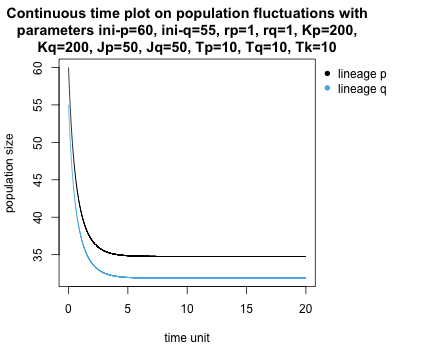

RObject{VecSxp}
$rect
$rect$w
[1] 6.379971

$rect$h
[1] 5.769665

$rect$left
[1] 20.90003

$rect$top
[1] 61.12544


$text
$text$x
[1] 22.72025 22.72025

$text$y
[1] 59.20222 57.27900




In [4]:
pops = convert(DataFrame, pops)
@rput pops
@rput t
@rput rp
@rput rq
@rput Kp
@rput Kq
@rput Jp
@rput Jq
@rput Tp
@rput Tq
@rput Tk
R"par(mar=c(5.1, 4.1, 4.1, 8.1), xpd=TRUE)"

R"matplot(x=t, y=pops, type='l', col=cbp[-2], lty=1, ylab='population size', xlab='time unit',
  main=paste0('Continuous time plot on population fluctuations with\nparameters ini-p=',pops[1,1],', ini-q=',pops[1,2],', rp=',rp,', rq=',rq,', Kp=',Kp,',\nKq=',Kq,', Jp=',Jp,', Jq=',Jq,', Tp=',Tp,', Tq=',Tq,', Tk=',Tk))"

R"legend('topright', inset=c(-.3, 0), legend=c('lineage p', 'lineage q'), pch=16, col=cbp[-2], bty='n')"

# Single parameter effect

## initial population of $q$

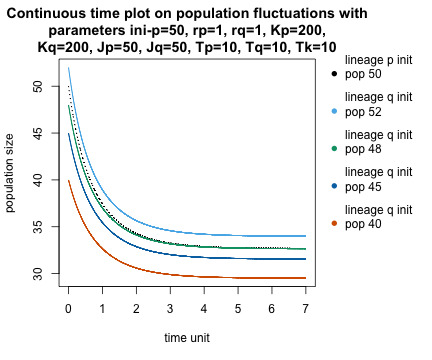

RObject{NilSxp}
NULL


In [5]:
t=sc.linspace(0,7,10000)


## parameters
rp = rq = 1
Kp = Kq = 200
Jp = Jq = 50
Tp = Tq = 10
Tk = 10

test = [52, 48, 45, 40]
for i in 1:length(test)
    pops=sc.array([50, test[i]])
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    pops = convert(DataFrame, pops)
    @rput i
    @rput pops
    R"if(i==1){pop<-pops}else{pop[,ncol(pop)+1]<-pops[,2]}"
end
## test model

## using R plots
@rput t
@rput rp
@rput rq
@rput Kp
@rput Kq
@rput Jp
@rput Jq
@rput Tp
@rput Tq
@rput Tk

R"legd<-paste0('lineage q init\npop ',pop[1,-1],'\n')"
R"par(mar=c(5.1, 4.1, 4.1, 8.1), xpd=TRUE)"

R"matplot(x=t, y=pop, type='l', col=cbp[-2], lty=c(3, rep(1,ncol(pop)-1)), ylab='population size', xlab='time unit',
  main=paste0('Continuous time plot on population fluctuations with\nparameters ini-p=',pop[1,1],', rp=',rp,', rq=',rq,', Kp=',Kp,',\nKq=',Kq,', Jp=',Jp,', Jq=',Jq,', Tp=',Tp,', Tq=',Tq,', Tk=',Tk))"

R"legend('topright', inset=c(-.4, -.1), legend=c(
    paste0('lineage p init\npop ',pop[1,1],'\n'),
    paste0('lineage q init\npop ',pop[1,-1],'\n')
    ), pch=16, col=cbp[-2], bty='n')"
R"write.table(pop,'simResult/sim_q.csv', sep=',', quote=F, row.names=F, col.names=F)"

## initial population of $p$

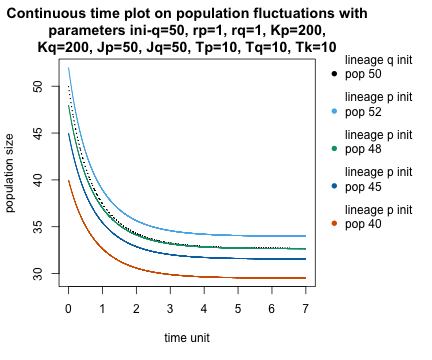

RObject{NilSxp}
NULL


In [6]:
t=sc.linspace(0,7,10000)


## parameters
rp = rq = 1
Kp = Kq = 200
Jp = Jq = 50
Tp = Tq = 10
Tk = 10

test = [52, 48, 45, 40]
for i in 1:length(test)
    pops=sc.array([test[i],50])
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    pops = convert(DataFrame, pops)
    @rput i
    @rput pops
    R"if(i==1){pop<-pops[,c(2,1)]}else{pop[,ncol(pop)+1]<-pops[,1]}"
end
## test model

## using R plots
@rput t
@rput rp
@rput rq
@rput Kp
@rput Kq
@rput Jp
@rput Jq
@rput Tp
@rput Tq
@rput Tk

R"par(mar=c(5.1, 4.1, 4.1, 8.1), xpd=TRUE)"

R"matplot(x=t, y=pop, type='l', col=cbp[-2], lty=c(3, rep(1,ncol(pop)-1)), ylab='population size', xlab='time unit',
  main=paste0('Continuous time plot on population fluctuations with\nparameters ini-q=',pop[1,1],', rp=',rp,', rq=',rq,', Kp=',Kp,',\nKq=',Kq,', Jp=',Jp,', Jq=',Jq,', Tp=',Tp,', Tq=',Tq,', Tk=',Tk))"

R"legend('topright', inset=c(-.4, -.1), legend=c(
    paste0('lineage q init\npop ',pop[1,1],'\n'),
    paste0('lineage p init\npop ',pop[1,-1],'\n')
    ), pch=16, col=cbp[-2], bty='n')"
R"write.table(pop,'simResult/sim_p.csv', sep=',', quote=F, row.names=F, col.names=F)"

## growth rate of lineage $p$

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rp.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_rp.gif")
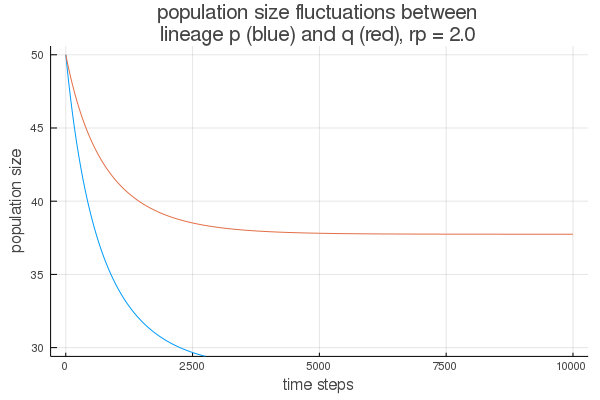

In [7]:
t=sc.linspace(0,7,10000)

## default parameters
rp = rq = 1
Kp = Kq = 200
Jp = Jq = 50
Tp = Tq = 10
Tk = 10

test=[2, 1.5, 1.3, 1.1, 1.05, .95, .8, .6, .4, .05]
aa = @animate for i in 1:length(test)
    rp = test[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), rp = "*string(test[i]), label="", ylim=[30, 50])

end
gif(aa, "simResult/sim_rp.gif", fps=1)

## carrying capacity $K_p$

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_Kp.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_Kp.gif")
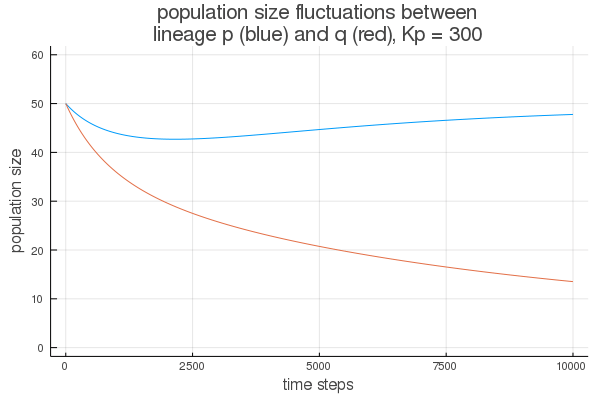

In [8]:
t=sc.linspace(0,7,10000)

## default parameters
rp = rq = 1
Kp = Kq = 200
Jp = Jq = 50
Tp = Tq = 10
Tk = 10

test=[300, 250, 220, 210, 205, 195, 190, 180, 150, 100]
aa = @animate for i in 1:length(test)
    Kp = test[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Kp = "*string(test[i]), label="", ylim=[0, 60])

end
gif(aa, "simResult/sim_Kp.gif", fps=1)

1. change of initial population do not cause interaction effects (p)
2. initial population higher, relative population stays upper hand (p)
3. increase rate of growth, lower share in climax ecosystem (rp)
4. increase carrying capacity, higher share in climax ecosystem (Kp)

## energy extraction ability / energy budget $J_p$

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_Jp.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_Jp.gif")
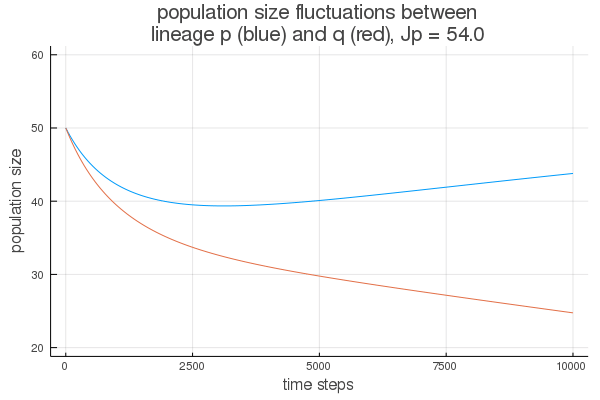

In [9]:
t=sc.linspace(0,7,10000)

## default parameters
rp = rq = 1
Kp = Kq = 200
Jp = Jq = 50
Tp = Tq = 10
Tk = 10

test=[54, 52, 51, 50.5, 50.1, 49.9, 49.5, 49, 48, 46]
aa = @animate for i in 1:length(test)
    Jp = test[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Jp = "*string(test[i]), label="", ylim=[20, 60])

end
gif(aa, "simResult/sim_Jp.gif", fps=1)

## Cell size $T_p$

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_Tp.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_Tp.gif")
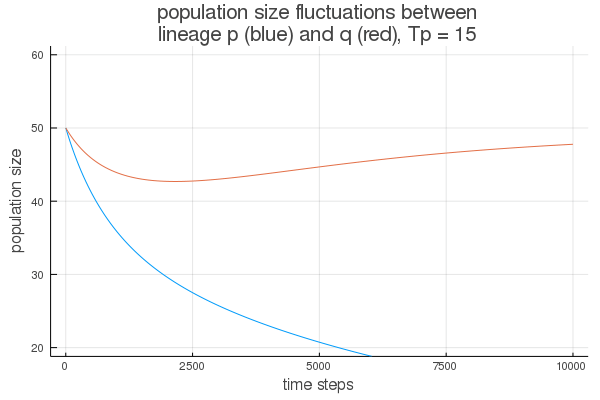

In [10]:
t=sc.linspace(0,7,10000)

## default parameters
rp = rq = 1
Kp = Kq = 200
Jp = Jq = 50
Tp = Tq = 10
Tk = 10

test=[15, 14, 13, 12, 11, 9, 8, 7, 6, 5]
aa = @animate for i in 1:length(test)
    Tp = test[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Tp = "*string(test[i]), label="", ylim=[20, 60])

end
gif(aa, "simResult/sim_Tp.gif", fps=1)

## temperature lost $T_k$

┌ Info: Saved animation to 
│   fn = /Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_Tk.gif
└ @ Plots /Users/Ho_Pok_Man/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Volumes/HPM-000/Academic/Masters/ICL_CMEE/Project/meeting/simResult/sim_Tk.gif")
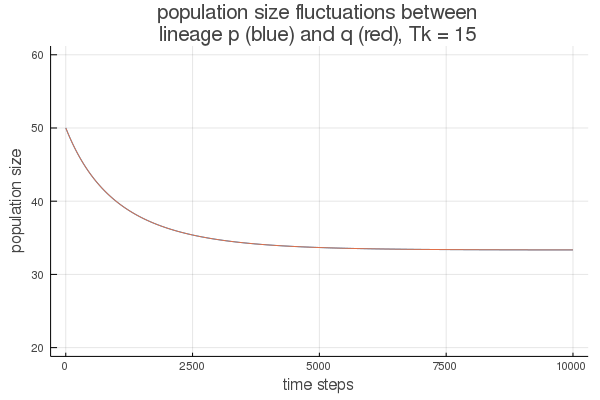

In [11]:
t=sc.linspace(0,7,10000)

## default parameters
rp = rq = 1
Kp = Kq = 200
Jp = Jq = 50
Tp = Tq = 10
Tk = 10

test=[15, 14, 13, 12, 11, 9, 8, 7, 6, 5]
aa = @animate for i in 1:length(test)
    Tk = test[i]
    
    pops = sc.array([50,50]) # unknown reason can't put it out of loop
    pops, infodict = itg.odeint(ebc_LVc, pops, t, full_output=true, args=(rp, rq, Kp, Kq, Jp, Jq, Tp, Tq, Tk))
    
    plot(pops, xlabel="time steps", ylabel="population size", title="population size fluctuations between\nlineage p (blue) and q (red), Tk = "*string(test[i]), label="", ylim=[20, 60])

end
gif(aa, "simResult/sim_Tk.gif", fps=1)

## parameter summary

# Two parameter effect

# Three parameter effect

# Random parameter effect

# Conclusion